In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [109]:
df = pd.read_csv("singindex_environment_data.csv", index_col=0).iloc[-40:-4]
metadf = pd.read_csv("singindex_environment_metadata.csv")

In [110]:
df.describe()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Agricultural land (sq. km),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Alternative and nuclear energy (% of total energy use),Aquaculture production (metric tons),Arable land (% of land area),Arable land (hectares per person),...,Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban population,Urban population (% of total population),Urban population growth (annual %),"Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)"
count,17.000000,19.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,35.000000,3.500000e+01,36.000000,36.000000,...,3.600000e+01,1.00000,1.000000,3.500000e+01,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,10.000000
mean,54.612613,81.419547,37.386189,4.516508e+07,3.207677e+06,1.911178e+06,8.498051,4.310524e+07,10.566428,0.221811,...,1.320846e+08,13.34857,14.403168,1.314686e+08,3.553380e+07,2.525895,2.821719e+09,46.601288,2.358628,19.651830
std,3.177581,3.878126,0.756882,3.158326e+06,1.381269e+05,2.165500e+05,1.125073,2.955312e+07,0.109332,0.021589,...,1.080901e+06,NaN,NaN,3.389987e+07,4.945360e+06,1.150302,6.741748e+08,4.418368,0.233355,14.648951
min,49.401348,72.658001,36.701221,3.977332e+07,3.026622e+06,1.523333e+06,5.952853,7.818586e+06,10.198986,0.187239,...,1.315120e+08,13.34857,14.403168,7.812736e+07,2.984857e+07,0.909574,1.793553e+09,39.771846,2.020090,9.168631
25%,52.057224,79.703186,36.823616,4.091725e+07,3.109523e+06,1.772787e+06,8.196375,1.666841e+07,10.529932,0.201554,...,1.315548e+08,13.34857,14.403168,1.039121e+08,3.183170e+07,1.518621,2.256726e+09,42.937917,2.207559,12.720216
50%,54.752746,82.112747,37.015067,4.686606e+07,3.165035e+06,1.898965e+06,8.596767,3.646387e+07,10.561386,0.224406,...,1.316342e+08,13.34857,14.403168,1.289503e+08,3.372412e+07,2.117245,2.763849e+09,46.121654,2.312511,15.714933
75%,57.242980,84.019163,37.897990,4.733122e+07,3.338490e+06,2.100418e+06,8.900800,6.326464e+07,10.640689,0.240624,...,1.316735e+08,13.34857,14.403168,1.546629e+08,3.976540e+07,3.473032,3.364763e+09,50.270691,2.593850,19.708924
max,59.340671,87.714456,38.895148,4.795942e+07,3.465770e+06,2.263530e+06,13.354083,1.060042e+08,10.764754,0.255996,...,1.345497e+08,13.34857,14.403168,1.997411e+08,4.455015e+07,4.985313,4.035768e+09,54.370833,2.855807,59.838179


## Pre-processing

### Build index components

In [111]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [128]:
df[index_comps].to_csv("singindex_environment_raw_components.csv")
df_index.to_csv("singindex_environment_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_environment_novel_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [129]:
from scipy import interpolate

In [130]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=2)

<AxesSubplot:xlabel='Date'>

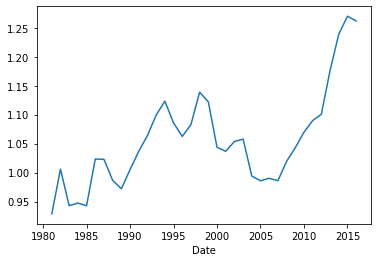

In [131]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [136]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(singindex_historic.index[-20:-1], singindex_historic.values[-20:-1], fill_value="extrapolate")

<AxesSubplot:>

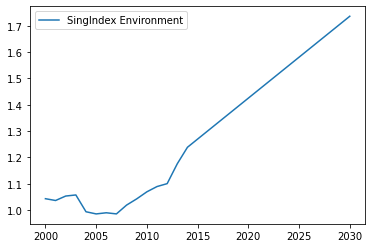

In [138]:
singindex = pd.DataFrame({"SingIndex Environment": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [127]:
singindex[-15:]

,SingIndex Health
2016,1.355704
2017,1.413815
2018,1.471926
2019,1.530037
2020,1.588148
2021,1.646259
2022,1.704370
2023,1.762480
2024,1.820591
2025,1.878702


### Export

In [139]:
df_interp_index.to_csv("singindex_environment_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_environment_avg_interpolate.csv")
singindex.to_csv("singindex_environment_avg_extrapolate_2000_2030.csv")